In [2]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.2 MB/s 


In [11]:
!pip install fcsparser

     |████████████████████████████████| 5.0 MB 5.2 MB/s 


In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import fcsparser
import csv
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import math
import statistics 
import timeit
from sklearn.cluster import KMeans
from scipy import stats
import scipy

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [4]:
meta, data = fcsparser.parse('/content/drive/MyDrive/AA1168_Mix2_C1.32034.fcs', meta_data_only=False, reformat_meta=True)
df=data.to_numpy()[0:45000]
#data.head()
len(df)

45000

In [82]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids

KMobj = KMedoids(n_clusters=7).fit(df)
# — — — — — — -Assigning Cluster Labels — — — — — — — — — — — -
labels = KMobj.labels_

In [83]:
print(f'Silhouette Score: {silhouette_score(df, labels)}')
print(f'Calinski Score: {calinski_harabasz_score(df, labels)}')
print(f'Davies Bouldin Score: {davies_bouldin_score(df, labels)}')

Silhouette Score: 0.3776111900806427
Calinski Score: 67458.29392026957
Davies Bouldin Score: 0.8487371093365857


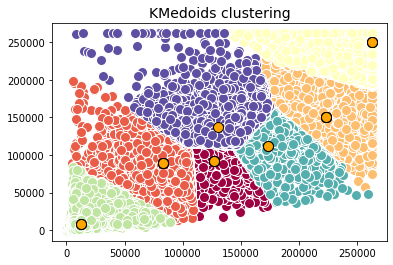

In [84]:
# — — — — — — -Extracting Unique Labels — — — — — — — — — — — -
unq_lab = set(labels)
# — — — — — — -Setting Up Color Codes — — — — — — — — — — — -
colors_plot = [
 plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unq_lab))
]
for k, col in zip(unq_lab, colors_plot):

  class_member_mask = labels== k
 
 # — — — — — — -Setting datapoint Feature X and Feature Y — — — — — — — — — — — -
  xy = df[class_member_mask]
  
  # — — — — — — -Plotting Feature X and Feature Y for each cluster labels — — — — — — — — — — — -
  
  plt.plot(
  xy[:, 0],
  xy[:, 1],
  "o",
  markerfacecolor=tuple(col),
  markeredgecolor='white',
  markersize=10,
  );
  # — — — — — — -Annotate Centroids — — — — — — — — — — — -
  plt.plot(
  KMobj.cluster_centers_[:, 0],
  KMobj.cluster_centers_[:, 1],
  "o",
  markerfacecolor="orange",
  markeredgecolor="k",
  markersize=10,
  );
# — — — — — — -Add title to the plot — — — — — — — — — — — -
plt.title("KMedoids clustering", fontsize=14);

In [13]:
import seaborn as sns

In [5]:
df2 = pd.DataFrame(data)[0:30000]
df2.shape

df1=df2

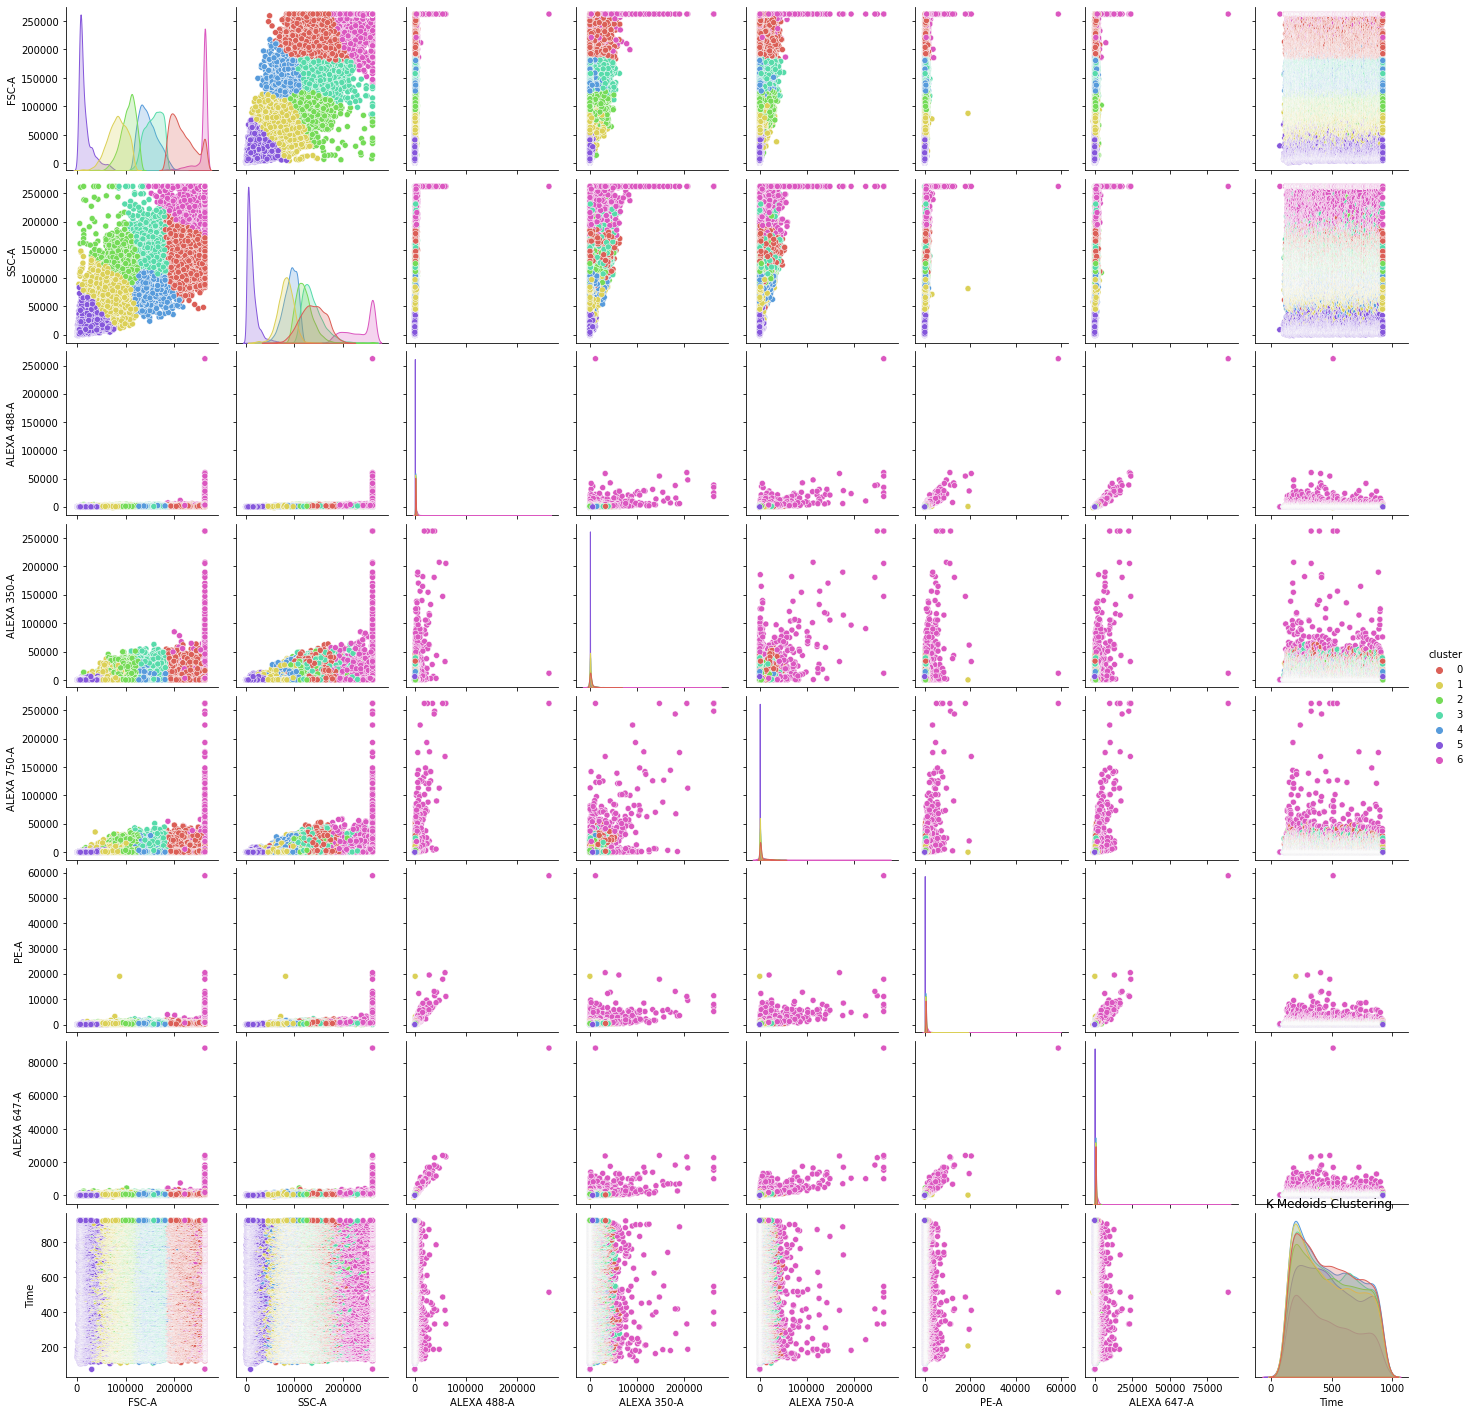

In [58]:
df1['cluster'] = KMedoids(n_clusters = 7).fit_predict(df2)
df1=pd.DataFrame(df1)
sns.pairplot(df1,hue = 'cluster', palette = sns.hls_palette(7))
plt.title("K-Medoids Clustering ")
plt.show()

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7)

df = pd.DataFrame(data)[0:30000]
# Fit the model to our dataset
gmm.fit(df)

# Predict the labels
gmm_labels = gmm.predict(df)

df3=df


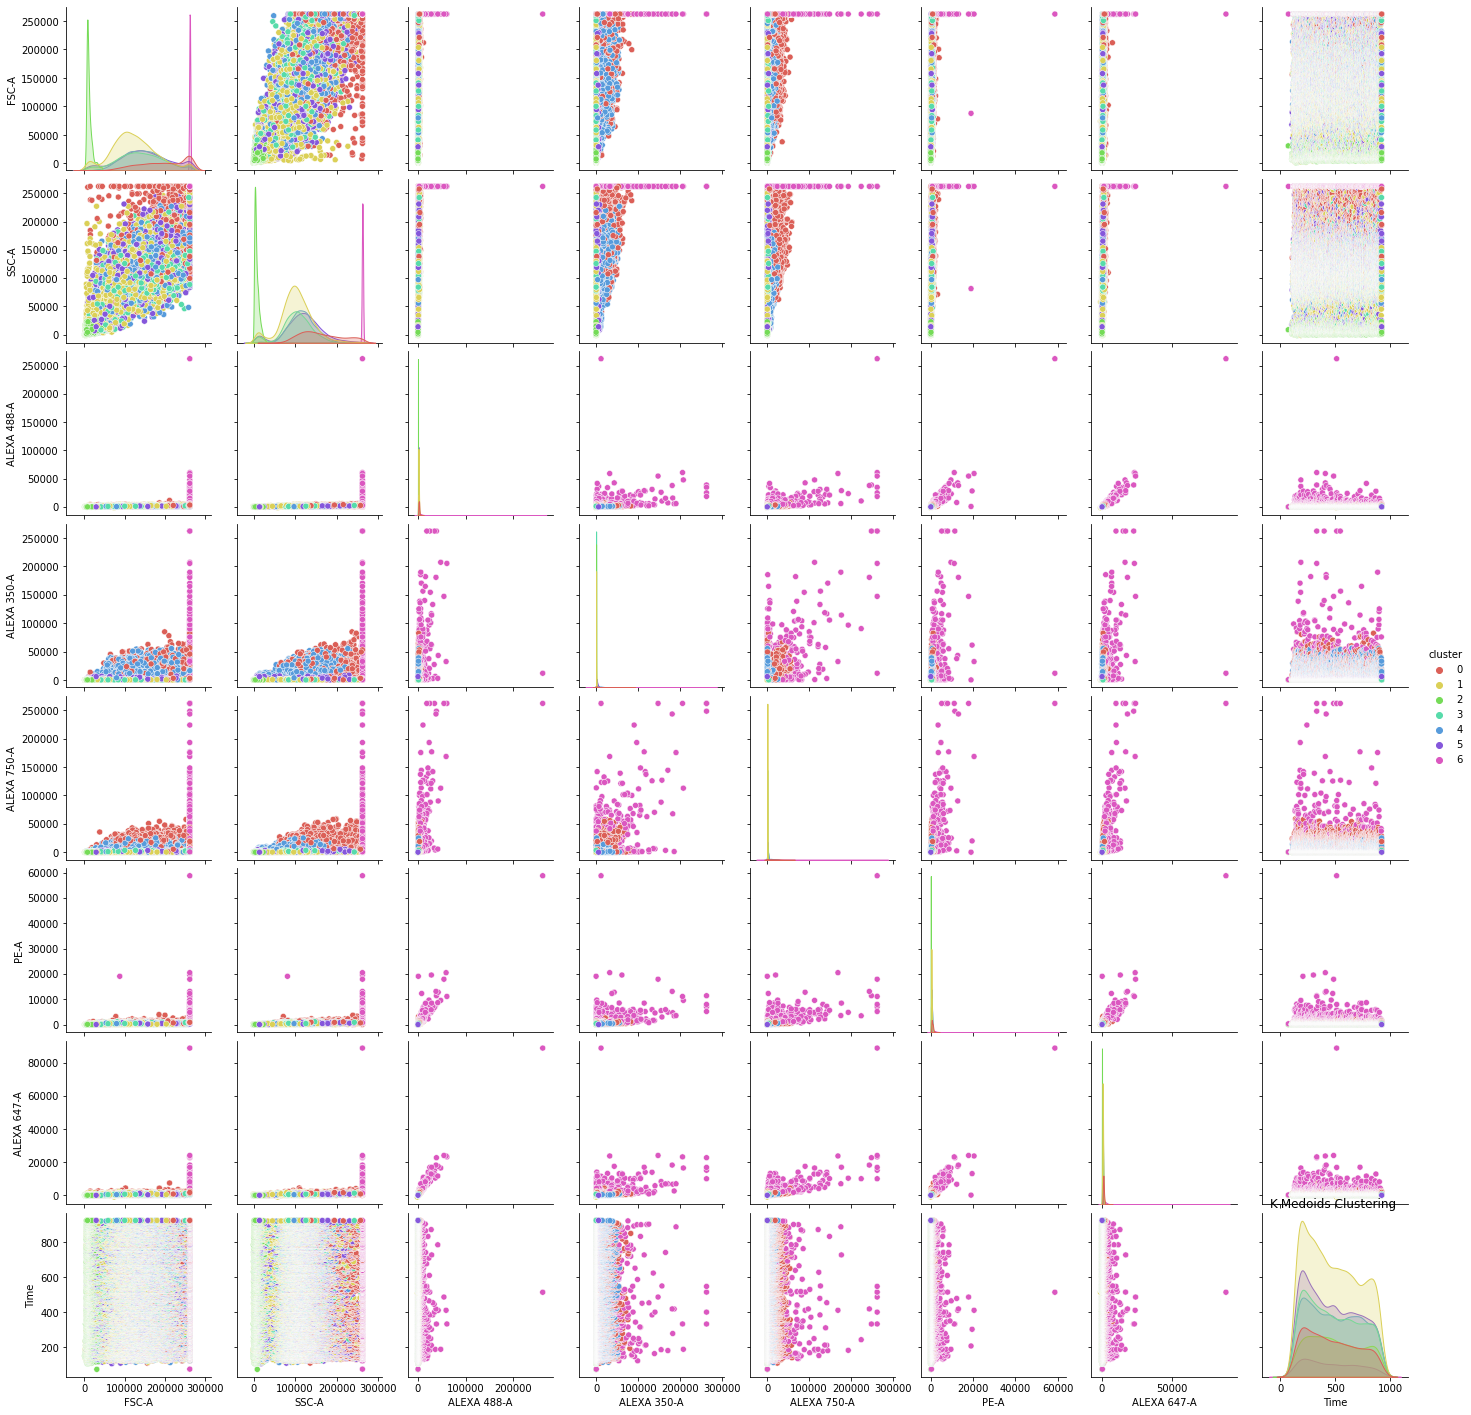

In [16]:
df3['cluster'] = GaussianMixture(n_components=7).fit_predict(df)
df3=pd.DataFrame(df3)
sns.pairplot(df3,hue = 'cluster', palette = sns.hls_palette(7))
plt.title("K-Medoids Clustering ")
plt.show()

In [17]:
print(f'Silhouette Score: {silhouette_score(df, gmm_labels)}')
print(f'Calinski Score: {calinski_harabasz_score(df, gmm_labels)}')
print(f'Davies Bouldin Score: {davies_bouldin_score(df, gmm_labels)}')

Silhouette Score: -0.015638903255756967
Calinski Score: 4772.822118732331
Davies Bouldin Score: 5.885142837989439
